# Predicting House Prices of Washington Using Machine Learning

Hanna Seyoum

## Problem Statement

House prices generally tend to go up with time, with some probability of crashing. With price increase, or decrease, many people (either looking to buy or sell) are affected. The goal is to predict current values of the houses so that buyers and sellers can make informed decisions.

## The Data

The data contains houses from the state of Washington with 18 attributes such as number of bedrooms and bathrooms, square footage of d/t parts of house, house location, etc. The dataset was acquired from Kaggle.

## Methodology

I have treated this as a supervised learning regression problem.

* Acquired dataset from Kaggle  
* Applied data wrangling & cleaning for feautre engineering and selection, and to handle missing values and outliers 
* Exploratory Data Analysis and Visualizations to find patterns and insights w.r.t various features in housing data  
* Hypothesis testing leveraging inferential statistics  
* Predictive modeling for house prices leveraging linear regression, ridge regression, and random forest regression. 

### Libraries

pandas for:  
    
    data loading, wrangling, cleaning, and manipulation  
    feature selection and engineering  
    descriptive statistics


numpy for:

    generate an array of values
    array sorting and manipulation
    

matplotlib and seaborn for:

    data visualization
    

scikit-learn for:

    data preprocessing
    regression and ensemble models
    cross-validation
    model selection
    model performance / metrics

### Data Wrangling & Cleaning

The data is a CSV file which I uploaded onto pandas as a data frame. A combination of feature engineering and selection was used. There were no NaNs, but instead there were 0s that indicated missing values in some entries.

**Cleaning steps**

* Used a combination of **feature engineering** & **feature selection**. The more the features the better, to a certain extent (i.e., curse of dimensionality), therefore I kept all features except for `statezip` which I deleted after splitting it into `state` and `zipcode` features. 

* Created a `month` feature by extracting the months from the `date` column to factor in how price is affected over time.

* Created a `total_sqft` feature by summing `sqft_living` and `sqft_lot`.

* Changed the data types of `waterfront` & `condition` features from `int` to `category` because they both have values `0` & `1` where 1 means yes & 0 means no.

* Split `statezip` feature into two features, `state` & `zipcode` and deleted the `statezip` after split.

**Handling missing/zero values**

* Found 2 houses with 0 bedrooms & 0 bathrooms that were priced over \$1 million. It was clear that they were erroneous data. Therefore I replaced the bedroom & bathroom values of both houses with the mean bedroom & bathroom values.

* The `yr_renovated` column is a numeric column with years of when the houses were last renovated, & 59.5\% of the rows have 0s as their value. I was not sure if the 0 meant that a house was never renovated, or if the renovation date was missing. I considered removing the column since 59.5\% of the rows are zeros, but instead of deleting the column, I added a boolean array column with 1s for all the houses that have a 0, and 0s for all the houses that have a renovation year listed.

* 1.1\% of the `Price` column has houses with 0 values. It is unlikely that the houses were worth \$0, so I did the same as with the `yr_renovated` column and added a boolean array column. I also created a new dataframe with these houses removed to compare it's models to the ones with \$0 house price included. There was a slight improvement in the models with the 0s removed. However, I don't think this improvement in model performance is worth removing 1.1\% of the data.

**Outliers**

* Found two 3-bedroom houses with prices over \$10 million. To check if they were outliers or possibly erroneous, I plotted a linear regression line of the `price` column & `sqft_living` column to check if the prices are high because of their square footage.

Result: They seem to be erroneous entries, so I created a new dataframe with both houses removed and compared it's model performance with the original dataframe's model. There was significant improvement in model performance. Therefore I've conducted remaining analysis with the dataframe exlcuding these 2 houses.

### Exploratory Data Analysis & Statistical Analysis Plots

**Feature Observation**

Some assumptions:

    Houses with more bedrooms will be worth more
    Houses with more bathrooms will be worth more
    Houses in bad condition will be worth less
    Houses with higher square footage will be worth more
    Houses with a waterfront will be worth more

* Plotted a heatmap of all the features and target variable to get an idea of their relationships.
* Plotted scatter plots of `price` against # of bedrooms, house size, and house condition. These plots showed a positive linear relationship between `sqft_living` & `price`, a non linear (polynomial) relationship between `bedrooms` & `price`, and the `condition` plot showed that houses in poor condition are worth much less than houses in moderate and good condition. Also, majority of the houses are in moderate condition, and the plot has a slightly parabolic shape.
* Plotted a barplot of `waterfront` vs `price` which showed that houses with waterfronts are worth more.
* Plotted a line plot of `yr_built` and `price`. This plot shows that house prices are higher with houses that are very old and also new. Old houses could be priced higher due to their historical value. 
* Plot of mean & median prices per bedrooms. Noticed a slight difference between the two plots, with mean prices being slightly larger than median prices. This could be due to some price outliers.
* Plot of mean & median house sizes per number of bedrooms. We see a strong positive linear relationship between `bedrooms` and `price`, and the mean & median plots are very similar.
* An ecdf plot of house prices by each month (may, june, & july) shows that house prices remained about the same in each month.

**Feature Importance**

The heatmap gives us a visual representation of the features correlation with each other and with the target variable `price`. In addition to the heatmap, I wrote a function that calculates the importance of each feature in regards to its predictability of the target variable, i.e., the relationship of each feature with the target variable. House size (`sqft_living`) holds the most importance in prediction. 

We can see that `sqft_living` has the highest correlation with `price`, with `sqft_above`, and `bathrooms` following. 
It's interesting that the `condition` of the house has a small effect on the price. It could be due to people's willingness to buy houses in poorer conditions at lower prices to fix them up themselves.

### Model Fitting

3 algorithms were used: Linear Regression, Ridge Regression & Random Forrest.

**Choosing hyperparameters**

*Ridge Regression*   
The hyperparameter that I tuned for Ridge is alpha. I tried values 0.0001, 0.001, 0.01, 0.1, 1, 10, and found alpha=0.0001 to be the best parameter.

*Random Forest*    
The hyperparameters that I tuned for Random Forest are n_estimators & max_depth, with best values of None & 200 respectively. 

With the above hyperparameters, I proceceded to fit several models using the 3 algorithims, using data with outlier prices removed, data with price outliers & zero prices removed, and using data with both included. Also fitted some models with parabolic transformations of the `bedrooms` feature since it had a parabolic shape. Overall, the best model was the Random Forest Regressor that was fitted with data excluding houses with erroneous prices.

## Results

Our initial assumptions of the features are confirmed: 

`bedrooms` and `sqft_living` having a linear relationship with `price`. In contrast, `waterfront` has an inversely proportional relationship with `price`.

$R^2$ represents the proportion of variance of the target variable `price` that has been explained by the features in the model. The higher the $R^2$ value the better. Random Forest resulted in the highest $R^2$ value of 65\%, which is better than average, but needs to be improved.

Text(0, 0.5, 'predicted prices')

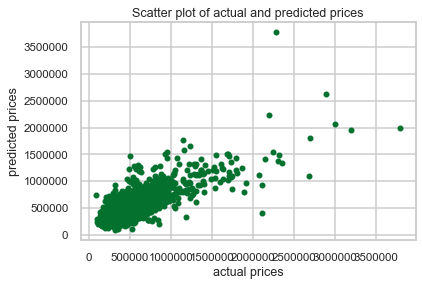

In [24]:
# scatter plot of actual price and predicted price of the linear model
plt.scatter(y_test_transformed, predictions_dict['lr_pred3'], s=20)
plt.title('Scatter plot of actual and predicted prices')
plt.xlabel('actual prices')
plt.ylabel('predicted prices')

We see in the above plot that the predicted prices are somewhat close to the actual prices, but not very close. The best case scenario would be for the scatter plots to follow a perfectly straight diagonal line, indicating that our model perfectly predicted the house prices. This is one visual indication that a linear regression model does not best fit this data. 

Let's take a look at a histogram of the residuals of the best performing linear regression model.

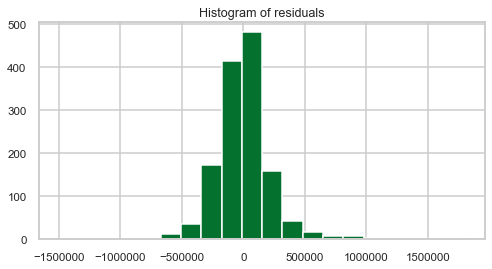

In [33]:
plt.subplots(figsize=(8,4))
plt.hist(y_test_transformed - predictions_dict['lr_pred3'], bins=20)
plt.title('Histogram of residuals')
plt.show()

Ideally a residual histogram would follow a normal distribution, and that would tell us that we've chosen an appropriate model type. However, the above plot does not closely follow a normal distribution, which is another indication that a linear regression model is not best for my dataset.

#### Accuracy Score Table

Below is an accuracy score table of all the models tested. We can see that Random Forest performed the best. 
The train & test scores are $R^2$ values and the train & test errors are the RMSE values. I chose RMSE instead of MSE since RMSE gives us the price value, while MSE gives us the price squared.

In [26]:
table.sort_values('test_score', ascending=False)

,model,test_score,train_score,test_error,train_error,price outs removed,description,features
10,random forest,0.651,0.944,217673.139,88051.867,yes,no transformations,"all except bedrooms, date, price, street, city..."
12,random forest,0.642,0.946,222715.763,85393.498,yes,parabolic transformation,"all except date, price, street, city, state"
11,random forest,0.635,0.947,224897.897,84269.506,yes,zero prices removed,"all except date, price, street, city, state"
3,linear regression,0.595,0.572,236687.279,239639.587,yes,zero prices removed,"all except date, price, street, city, state"
4,linear regression,0.595,0.572,236648.326,239620.430,yes,parabolic transformation,"all except date, price, street, city, state"
7,ridge regression,0.595,0.572,236687.280,239639.587,yes,zero prices removed,"all except date, price, street, city, state"
8,ridge regression,0.595,0.572,236648.328,239620.430,yes,parabolic transformation,"all except date, price, street, city, state"
2,linear regression,0.565,0.577,242953.056,241694.255,yes,no transformations,"all except date, price, street, city, state"
6,ridge regression,0.565,0.577,242953.051,241694.255,yes,no transformations,"all except date, price, street, city, state"
9,random forest,0.079,0.952,815920.713,83409.410,no,no transformations,"all except date, price, street, city, state"


Model description:
* Models described as having no transformations are those which did not have their `bedrooms` feature undergo parabolic transformation.
* Models with zero prices removed are those with zero values in the `price` feature and price outliers removed.
* Models with parabolic transformation are based on data with price outliers and zero prices removed, and have their `bedrooms` feature transformed.

From the table above we can see that the best model is the Random Forest with 66% accuracy. That model only has the price outliers removed but not the zero prices. There were also no transformations on the features.

**Analysing the coefficients**

Let's take a look at the coefficients of the best performing ridge regression model that has its `bedrooms` feature transformed.

In [31]:
coefs

,Coef
bedrooms,-73983.937888
bathrooms,41692.401968
sqft_living,180.235738
sqft_lot,-4.171500
floors,62571.711411
waterfront,468650.386551
view,54503.817213
condition,29156.616047
sqft_above,102.644951
sqft_basement,77.368144


The coefficient of a term represents the change in the mean response for one unit of change in that term. If the coefficient is positive, as the term increases, the mean value of the response increases. If the coefficient is negative, as the term increases, the mean value of the response decreases. So for example we see than the coefficient of `sqft_living` is 180. This means that for every 1 sqft increase on a house, the price would increase by \\$180.

I was surprised to see `bedrooms` have a negative coeficient, since my assumption was that when the number of bedrooms increase, so does the price. However, we saw previously with a `bedrooms` and `price` scatterplot that price increases with number of bedrooms only for homes with up to 5 bedrooms. The price then starts to decrease for homes with 6 bedrooms or more.  
Notice also `bedrooms_squared` has a positive coeficient. This feature is `bedrooms` with a parabolic transformation. Since this feature has adjusted for `bedrooms` shape, it makes sense that it is positive.

Not only is the coefficient of `sqft_lot` negative, but it's also a small number, indicating that its affect on  price is miniscule.

**In-depth Analysis**

The following analysis is based on my 95% confidence that the error in the home price predictions is between -429250 and -429250:

If I've predicted a house to be $\$$500,000 and someone were to buy the house at that price, the worst loss would be \\$429250 and the highest gain would be \\$429250. That is, the least the house would be worth is \\$70,750 (500,000-429250), and the most the house would be worth is \\$929,250 (500,000+429250).

Let's say my boss wants to buy a house at below my estimate in the hopes of flipping it, i.e., selling the house at around double the price at which he acquired it. With a house that I have estimated to be \\$500,000, if he purchases it at \\$300,000 for example, 3 things can happen:

1. My estimation is correct and he would make a profit of \\$200,000 by selling it for \\$500,000.  
2. The house is actually worth \\$70,750 and he ends up buying at a higher price than what the house is worth, losing \\$229,250 on the purchase, and resulting in a 24\% loss.
3. The house is actually worth \\$929,250 and he ends up buying \\$629,250 below the house value, resulting in a 309\%  profit if he were to sell it at \\$929,250.

**What happens if my boss purchases 100 homes at my predicted price?**

If my boss was to buy 100 homes at my predicted price and sell them at their true price, I can be 95\% confident that the most she would lose is \\$4,358,500 and the most she would gain is \\$4,979,500.

**What happens if my boss purchases 100 homes \\$1000 below my predicted prices?**

If my boss was to buy 100 homes at \\$1000 less than my predicted price and sell them at their true price, I can be 95% confident that the most she would lose is \\$4,309,300 and the most she would gain is \\$4,734,600.

So if she purchases 100 homes at $1000 below my predicted price, the most she would lose decreases by \\$49,200.
This is clearly a better option, and since finding homes that are selling \\$1000 below their true value is practical, I would recommend this plan to my boss.

Below is a histogram of the distribution of purchasing 100 homes at my predicted prices.

-20872 25984


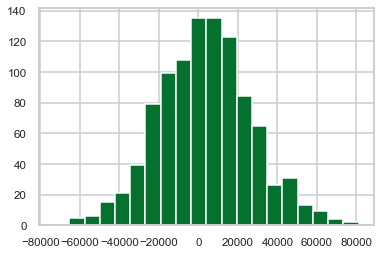

In [27]:
plt.hist(error_means, bins=20)
plt.plot()
print(min_error, max_error)

It shows that the mode is shifted to the positive, which is good because it means we're profiting. I conducted this experiment a few more times to make sure the shape is real.

Other experiments:
* experiments with other models
* experiemnts with predicted prices reduced by \\$5,000, \\$10,000, \\$50,000

When running experiments using my other models, the Random Forest model resulted in the most profit, which was expected since the model had the least error in its prediction.

I ran experiments with \\$5,000, \\$10,000, \\$50,000 deducted from the predicted prices. 
This means that my boss would purchase 100 homes with \\$5,000, \\$10,000, and \\$50,000 below my predicted prices. 
The result was that these 3 experiments produced better profits and less losses than the scenario where my boss would purchase homes at \\$1000 less than my predicted prices. However, finding 100 houses at those reduced prices would be difficult. Therefore, I would reccomend focusing on finding homes with the \\$1000 reductions.

## Model Limitations

Linear regression: assumes a straight line relationship between the features and target variable. My data did not have a linear relationship. House prices do increase as square footage and number of bedrooms increase, but once the square footage reaches a certain point, and once the houses get up to 6 bedrooms, the house prices start to decrease. Also, there aren't many houses with over 6 bedrooms, so the decrease in average price for houses with over 6 bedrooms could be due to lack of sufficient data.

Ridge regression: same as linear regression in that it assumes a linear relationship between the feature and target variables. 

Random forest regression:
Random Forest can’t extrapolate. It can only make a prediction that is an average of previously observed labels. Therefore, the range of predictions a Random Forest can make is bound by the highest and lowest labels in the training data.

## Conclusion

Out of all the models, Random Forest yielded the best prediction accuracy of around 65%. Linear Regression had the poorest performance. This is due to the data having many features that are not linearly correlated to the target variable `price`.

## Next Steps

To improve the prediction accuracy of my model I will do the following:
* Scrape Washington state data such as city population, salary, and schools to gain more insight
* Transform more features when modeling

## Code

## Data Preparation

In [3]:
# import necessary modules/libraries

import numpy as  np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import pearsonr

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.7)
sns.set_palette("Greens_r")
#set_palette("Set1", 8, .75) # makes plot lines red

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from sklearn.preprocessing import Imputer # to impute missing data

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

%matplotlib inline

# read the data
df1 = pd.read_csv('house_price_prediction.csv')
df2 = df1.copy()

# change date col to datetime
df2['date'] = pd.to_datetime(df2['date'])

# change data types of 'waterfront' & 'condition' to categorical
df2[['waterfront', 'condition']] = df1[['waterfront', 'condition']].astype('category')

## Feature Engineering

In [4]:
# splittig statezip into state & zipcode features & removing statezip
df2['state'] = df2['statezip'].apply(lambda x: x.split(' ')[0])
df2['zipcode'] = df2['statezip'].apply(lambda x: int(x.split(' ')[1]))
df2 = df2.drop('statezip', axis='columns')

# creating total_sqft feature: sqft_above + sqft_lot
df2['total_sqft'] = df2.sqft_living + df2.sqft_lot

# creating month feature
df2['month'] = pd.DatetimeIndex(df2['date']).month

df3 = df2.copy()

# creating a column of boolean arrays with 1s for when price is $0 & 0s for when price is not $0
df3['price_is_zero'] = (df3['price'] == 0).astype(int)

# creating a column of boolean arrays with 1s for when yr_renov is 0 & 0s for others
df3['renov_date_is_zero'] = (df3['yr_renovated'] == 0).astype(int)

# replacing 0s with the mean bedroom & bathroom values
df3["bedrooms"].replace({0: round(df3["bedrooms"].mean(), 0)}, inplace=True)
df3["bathrooms"].replace({0: round(df3["bathrooms"].mean(), 0)}, inplace=True)

# removing price outliers
df_no_outs = df3[df3.price < 10000000].copy()

# creating a new dataframe with $0 prices removed to compare later
df_no_zeros = df_no_outs[df_no_outs["price"] != 0].copy()

## Statistical Data Analysis

In [5]:
meanprice_bedrooms = df_no_zeros.groupby('bedrooms')['price'].mean()
medianprice_bedrooms = df_no_zeros.groupby('bedrooms')['price'].median()

meansqft_bedroom = df_no_zeros.groupby("bedrooms")["sqft_living"].mean()
mediansqft_bedroom = df_no_zeros.groupby("bedrooms")["sqft_living"].median()

may_price = df_no_zeros[df_no_zeros.month==5]['price']
june_price = df_no_zeros[df_no_zeros.month==6]['price']
july_price = df_no_zeros[df_no_zeros.month==7]['price']

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)

    x = np.sort(data)

    y = np.arange(1, n+1) / n

    return x, y

# Compute ECDFs
x_5, y_5 = ecdf(may_price)
x_6, y_6 = ecdf(june_price)
x_7, y_7 = ecdf(july_price)

### Feature Importance

In [6]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

def feature_importance(X, y, model='reg'):
    score_func = {'reg': f_regression}

    # Score each of the features
    bestfeatures = SelectKBest(score_func=score_func[model], k='all')
    fit = bestfeatures.fit(X, y)

    # Organize and return the scores
    featureScores = pd.DataFrame([X.columns, fit.scores_]).T
    featureScores.columns = ['Feature', 'Score']
    return featureScores.sort_values('Score', ascending=False).set_index('Feature') 

# Data Modeling

## Data Preprocessing

In [7]:
df_no_outs = df3[df3.price < 10000000]
df_no_zeros = df_no_outs[df_no_outs["price"] != 0]

# dataframe with both zero prices and outliers.
X = df3.drop(['price', 'date', 'street', 'city', 'state', 'country'], axis='columns')
y = df3["price"]
# splitting data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# dataframe without price outliers
X_no_outs = df_no_outs.drop(['price', 'date', 'street', 'city', 'state', 'country'], axis='columns')
y_no_outs = df_no_outs["price"]
X_train_no_outs, X_test_no_outs, y_train_no_outs, y_test_no_outs = train_test_split(X_no_outs, y_no_outs, test_size = 0.3, random_state=42)

# dataframe without $0 price values
X_no_zeros = df_no_zeros.drop(['price', 'date', 'street', 'city', 'state', 'country'], axis='columns')
y_no_zeros = df_no_zeros["price"]
X_train_no_zeros, X_test_no_zeros, y_train_no_zeros, y_test_no_zeros = train_test_split(X_no_zeros, y_no_zeros, test_size = 0.3, random_state=42)

# dataframe with a parabolic transformation on the `bedrooms` feature
X_transformed = df_no_zeros.drop(['price', 'date', 'street', 'city', 'state', 'country'], axis='columns')
X_transformed['bedrooms_squared'] = X['bedrooms']**2  # parabolic transformation of bedrooms
y_transformed = df_no_zeros['price']
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(X_transformed, y_transformed, test_size = 0.3, random_state=42)


In [8]:
# 4 training sets and test sets
# 3 algorithms

train_test_sets = [
    [X_train, X_test, y_train, y_test],
    [X_train_no_outs, X_test_no_outs, y_train_no_outs, y_test_no_outs],
    [X_train_no_zeros, X_test_no_zeros, y_train_no_zeros, y_test_no_zeros],
    [X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed],
]

train_test_dicts = []
for i, sets in enumerate(train_test_sets):
    d = dict(zip('X_train X_test y_train y_test'.split(), sets))
    train_test_dicts.append(d)

algorithms = [LinearRegression, Ridge, RandomForestRegressor]
names = ['linear regression', 'ridge regression ', 'random forest    ']

In [11]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    y_pred = model.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    return rmse
    
def calc_test_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return rmse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error, and their accuracy score'''
    
    model.fit(X_train, y_train)
    
    train_error = calc_train_error(X_train, y_train, model)
    test_error = calc_test_error(X_test, y_test, model)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    y_pred = model.predict(X_test)
    return train_error, test_error, train_score, test_score, y_pred

In [12]:
lr_train_score = []
lr_test_score = []
lr_train_error = []
lr_test_error = []

ridge_train_score = []
ridge_test_score = []
ridge_train_error = []
ridge_test_error = []

rf_train_score = []
rf_test_score = []
rf_train_error = []
rf_test_error = []

predictions_dict = dict()

for sets in train_test_dicts:
    
    # linear regression
    
    #model = algorithms[0]()
    lr = LinearRegression()
    train_error, test_error, train_score, test_score, y_pred = calc_metrics(model=lr, **sets)
    train_error, test_error, train_score, test_score = round(train_error, 3), round(test_error, 3), round(train_score, 3), round(test_score, 3)
    #print('train error: {} | test error: {}'.format(train_score, test_score))
    
    lr_train_error.append(train_error)
    lr_test_error.append(test_error)
    lr_train_score.append(train_score)
    lr_test_score.append(test_score)
    
    for i in range(4):
        predictions_dict['lr_pred{}'.format(i)] = y_pred
    
    # ridge regression
    
    #model = algorithms[1](alpha=0.0001)
    ridge = Ridge(alpha=0.0001)
    train_error, test_error, train_score, test_score, y_pred = calc_metrics(model=ridge, **sets)
    train_error, test_error, train_score, test_score = round(train_error, 3), round(test_error, 3), round(train_score, 3), round(test_score, 3)
    #print('train error: {} | test error: {}'.format(train_score, test_score))
    
    ridge_train_error.append(train_error)
    ridge_test_error.append(test_error)
    ridge_train_score.append(train_score)
    ridge_test_score.append(test_score)
    
    for i in range(4):
        predictions_dict['ridge_pred{}'.format(i)] = y_pred
    
    # random forest
    
    #model = algorithms[2](max_depth=None, n_estimators=200)
    rf = RandomForestRegressor(max_depth=None, n_estimators=200)
    train_error, test_error, train_score, test_score, y_pred = calc_metrics(model=rf, **sets)
    train_error, test_error, train_score, test_score = round(train_error, 3), round(test_error, 3), round(train_score, 3), round(test_score, 3)
    #print('train error: {} | test error: {}'.format(train_score, test_score))
    
    rf_train_error.append(train_error)
    rf_test_error.append(test_error)
    rf_train_score.append(train_score)
    rf_test_score.append(test_score)
    
    for i in range(4):
        predictions_dict['rf_pred{}'.format(i)] = y_pred

In [13]:
features1 = 'all except date, price, street, city, state'
features2 = 'all except date, price, street, city, state'
features3 = 'all except date, price, street, city, state'
features4 = 'all except date, price, street, city, state'
features5 = 'all except bedrooms, date, price, street, city, state'
features6 = 'all except date, price, street, city, state'
features7 = 'all except date, price, street, city, state'
features8 = 'all except date, price, street, city, state'
features9 = 'all except date, price, street, city, state'
features10 = 'all except bedrooms, date, price, street, city, state'
features11 = 'all except date, price, street, city, state'
features12 = 'all except date, price, street, city, state'


content = {'features': [features1, features2, features3, features4, features5, features6, features7, features8, 
                        features9, features10, features11, features12], 
           'model': ['linear regression', 'linear regression', 'linear regression', 'linear regression',
                     'ridge regression', 'ridge regression', 'ridge regression', 'ridge regression', 
                     'random forest', 'random forest', 'random forest', 'random forest'], 
           'test_error': [lr_test_error[0], lr_test_error[1], lr_test_error[2], lr_test_error[3], 
                    ridge_test_error[0], ridge_test_error[1], ridge_test_error[2], ridge_test_error[3], 
                    rf_test_error[0], rf_test_error[1], rf_test_error[2], rf_test_error[3]],
           'train_error': [lr_train_error[0], lr_train_error[1], lr_train_error[2], lr_train_error[3], 
                    ridge_train_error[0], ridge_train_error[1], ridge_train_error[2], ridge_train_error[3], 
                    rf_train_error[0], rf_train_error[1], rf_train_error[2], rf_train_error[3]],
           'test_score': [lr_test_score[0], lr_test_score[1], lr_test_score[2], lr_test_score[3], 
                     ridge_test_score[0], ridge_test_score[1], ridge_test_score[2], ridge_test_score[3],  
                     rf_test_score[0], rf_test_score[1], rf_test_score[2], rf_test_score[3]],
           'train_score': [lr_train_score[0], lr_train_score[1], lr_train_score[2], lr_train_score[3],
                             ridge_train_score[0], ridge_train_score[1], ridge_train_score[2], ridge_train_score[3],
                             rf_train_score[0], rf_train_score[1], rf_train_score[2], rf_train_score[3]],
           'description': ['no transformations', 'no transformations', 'zero prices removed', 'parabolic transformation', 
                           'no transformations', 'no transformations', 'zero prices removed', 'parabolic transformation', 
                           'no transformations', 'no transformations', 'zero prices removed', 'parabolic transformation', 
                            ],
           'price outs removed': ['no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes']}

table = pd.DataFrame(content, columns=['model', 'test_score', 'train_score', 'test_error', 'train_error', 'price outs removed', 'description', 'features'], index=[1,2,3,4,5,6,7,8,9,10,11,12])
table.sort_values('test_score', ascending=False)

,model,test_score,train_score,test_error,train_error,price outs removed,description,features
10,random forest,0.651,0.944,217673.139,88051.867,yes,no transformations,"all except bedrooms, date, price, street, city..."
12,random forest,0.642,0.946,222715.763,85393.498,yes,parabolic transformation,"all except date, price, street, city, state"
11,random forest,0.635,0.947,224897.897,84269.506,yes,zero prices removed,"all except date, price, street, city, state"
3,linear regression,0.595,0.572,236687.279,239639.587,yes,zero prices removed,"all except date, price, street, city, state"
4,linear regression,0.595,0.572,236648.326,239620.430,yes,parabolic transformation,"all except date, price, street, city, state"
7,ridge regression,0.595,0.572,236687.280,239639.587,yes,zero prices removed,"all except date, price, street, city, state"
8,ridge regression,0.595,0.572,236648.328,239620.430,yes,parabolic transformation,"all except date, price, street, city, state"
2,linear regression,0.565,0.577,242953.056,241694.255,yes,no transformations,"all except date, price, street, city, state"
6,ridge regression,0.565,0.577,242953.051,241694.255,yes,no transformations,"all except date, price, street, city, state"
9,random forest,0.079,0.952,815920.713,83409.410,no,no transformations,"all except date, price, street, city, state"


Coefficients of the best performing ridge regression model that has its `bedrooms` feature transformed.

In [30]:
coefs = pd.DataFrame(ridge.coef_, index=list(X_transformed), columns=['Coef'])
coefs

,Coef
bedrooms,-73983.937888
bathrooms,41692.401968
sqft_living,180.235738
sqft_lot,-4.171500
floors,62571.711411
waterfront,468650.386551
view,54503.817213
condition,29156.616047
sqft_above,102.644951
sqft_basement,77.368144


### CI around my prediction accuracy

In [15]:
# RMSE == standard deviation of errors
rf_test_error

[815920.713, 217673.139, 224897.897, 222715.763]

In [16]:
one_sd = min(rf_test_error)
two_sd = 2*one_sd
three_sd = 3*one_sd

#### 68% Confidence

In [17]:
min_error = 0 - one_sd
max_error = 0 + one_sd

print('I can be 68% confident that the error in the home price predictions will be '
      'between {} and {}.'.format(min_error, max_error))

I can be 68% confident that the error in the home price predictions will be between -217673.139 and 217673.139.


#### 95% Confidence

In [18]:
min_error = 0 - two_sd
max_error = 0 + two_sd

print('I can be 95% confident that the error in the home price predictions will be '
      'between {} and {}.'.format(min_error, max_error))

I can be 95% confident that the error in the home price predictions will be between -435346.278 and 435346.278.


**What happens if my boss purchases 100 homes?**

In [19]:
from math import sqrt

np.random.seed(47)
n = 100 # length of sample

# function to sample the actual and predicted prices of 100 homes at a time.
def draw_bs_reps(y_test, y_pred):
    bs_error = np.random.choice(y_test - y_pred, n) # price sold - price bought == profit (gain or loss)
    
    error_mean = np.sum(bs_error) / len(bs_error) # avg gain or loss on n transactions
    return error_mean

In [28]:
error_means = np.array([draw_bs_reps(y_test_transformed, predictions_dict['rf_pred3']) for i in range(1000)]) # Random Forest model
error_means = np.round(error_means, 2)
error_means_mean = np.mean(error_means) # mean of means
print('mean of means: {}'.format(int(error_means_mean)))

error_means_std = sqrt(np.sum((error_means-error_means_mean)**2) / (1000-1)) # standard deviation of means
print('std of means: {}'.format(int(error_means_std)))

# confidence interval
min_error = int(error_means_mean - 2*error_means_std)
max_error = int(error_means_mean + 2*error_means_std)

print('')
print('The above result means that if I calculate the error between the true/historical price and my predicted price ' 
      'of 100 homes, I can be 95% confident that the error of the mean of average error in the home price ' 
      'predictions will be between {:,} and {:,}.'.format(min_error*100, max_error*100))
print('')
print('In other words, if my boss was to buy 100 homes at my predicted price and sell them at their true price, ' 
      'I can be 95% confident that the most she would lose is ${:,} ' 
      'and the most she would gain is ${:,}.'.format(-1*min_error*100, max_error*100))

mean of means: 2872
std of means: 22766

The above result means that if I calculate the error between the true/historical price and my predicted price of 100 homes, I can be 95% confident that the error of the mean of average error in the home price predictions will be between -4,266,000 and 4,840,600.

In other words, if my boss was to buy 100 homes at my predicted price and sell them at their true price, I can be 95% confident that the most she would lose is $4,266,000 and the most she would gain is $4,840,600.


Histogram of the distribution of purchasing 100 homes at my predicted prices.

-20872 25984


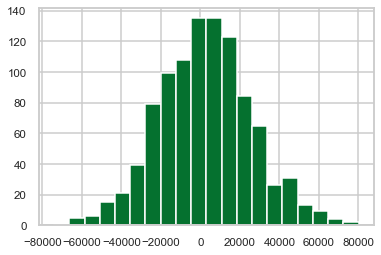

In [21]:
plt.hist(error_means, bins=20)
plt.plot()
print(min_error, max_error)

What happens if my boss purchases homes $1000 below my predicted prices?

In [22]:
# running the same experiment as before, with $1000 deducted from my predicted prices

np.random.seed(47)
n = 100 # length of sample
N_rep = 1000 # number of times to bootstrap/resample

def draw_bs_reps(y_test, y_pred):
    bs_error = np.random.choice(y_test - (y_pred-1000), n) # deduct 1000 from each predicted price
    
    error_mean = np.sum(bs_error) / len(bs_error) # avg gain or loss on n transactions
    return error_mean

In [29]:
error_means = np.array([draw_bs_reps(y_test_transformed, predictions_dict['rf_pred3']) for i in range(1000)]) # Random Forest model
error_means = np.round(error_means, 2)
error_means_mean = np.mean(error_means) # mean of means
print('mean of means: {}'.format(int(error_means_mean)))

error_means_std = sqrt(np.sum((error_means-error_means_mean)**2) / (1000-1)) # standard deviation of means
print('std of means: {}'.format(int(error_means_std)))

# confidence interval
min_error_1000 = int(error_means_mean - 2*error_means_std)
max_error_1000 = int(error_means_mean + 2*error_means_std)

print('')
print('If my boss was to buy 100 homes at $1000 less than my predicted price and sell them at their true price, ' 
      'I can be 95% confident that the most she would lose is ${:,} ' 
      'and the most she would gain is ${:,}.'.format(-1*min_error_1000*100, max_error_1000*100))

mean of means: 3280
std of means: 22203

If my boss was to buy 100 homes at $1000 less than my predicted price and sell them at their true price, I can be 95% confident that the most she would lose is $4,112,500 and the most she would gain is $4,768,700.
